In [53]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [54]:
file_output_city_csv = "generated_data/city_data.csv"
file_output_rides_csv = "generated_data/ride_data.csv"
output_city_df = pd.read_csv(file_output_city_csv)
output_rides_df =  pd.read_csv(file_output_rides_csv)
output_city_df.drop_duplicates('city',inplace=True)


In [55]:
frame_df_merge = pd.merge(output_city_df,output_rides_df,on='city',how='outer')
frame_df_merge

,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543
5,Tammyburgh,11,Urban,2017-01-02 21:29:38,5.37,5531485446571
6,Tammyburgh,11,Urban,2017-01-02 23:58:17,11.68,1012442651497
7,Tammyburgh,11,Urban,2017-01-02 21:10:16,31.16,7261786411548
8,Tammyburgh,11,Urban,2017-01-02 00:43:50,10.64,9221421228793
9,Tammyburgh,11,Urban,2017-01-01 12:39:10,9.88,6250336876297


In [56]:
#Urban Average Fare ($) Per City by type Urban
urban_average_fare_per_city_groupby = frame_df_merge[frame_df_merge.type=='Urban'].groupby('city')
urban_average_fare_per_city_groupby.fare.mean()
urban_average_fare = urban_average_fare_per_city_groupby.fare.mean()

#Suburban Average Fare ($) Per City by type Urban
Suburban_average_fare_per_city_groupby = frame_df_merge[frame_df_merge.type=='Suburban'].groupby('city')
Suburban_average_fare_per_city_groupby.fare.mean()
Suburban_average_fare = Suburban_average_fare_per_city_groupby.fare.mean()

#Rural Average Fare ($) Per City by type Urban
Rural_average_fare_per_city_groupby = frame_df_merge[frame_df_merge.type=='Rural'].groupby('city')
Rural_average_fare_per_city_groupby.fare.mean()
Rural_average_fare = Rural_average_fare_per_city_groupby.fare.mean()


In [59]:
#Urban Total Number of Rides Per City
urban_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Urban'].groupby('city')
urban_number_driver_per_city.ride_id.count()
urban_number_ride_count = urban_number_driver_per_city.ride_id.count()

#Suburban Total Number of Rides Per City
Suburban_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Suburban'].groupby('city')
Suburban_number_driver_per_city.ride_id.count()
Suburban_number_ride_count = Suburban_number_driver_per_city.ride_id.count()

#Rural Total Number of Rides Per City
Rural_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Rural'].groupby('city')
Rural_number_driver_per_city.ride_id.count()
Rural_number_ride_count = Rural_number_driver_per_city.ride_id.count()

In [66]:
#Urban Total Number of Drivers Per City
urban_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Urban'].groupby('city')
urban_number_driver_per_city.driver_count.mean()
urban_number_driver_count = urban_number_driver_per_city.driver_count.mean()
#Total Number of Drivers Per City
Suburban_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Suburban'].groupby('city')
Suburban_number_driver_per_city.driver_count.mean()
Suburban_number_driver_count=Suburban_number_driver_per_city.driver_count.mean()

#Total Number of Drivers Per City
Rural_number_driver_per_city = frame_df_merge[frame_df_merge.type=='Rural'].groupby('city')
Rural_number_driver_per_city.driver_count.mean()
Rural_number_driver_count = Rural_number_driver_per_city.driver_count.mean()

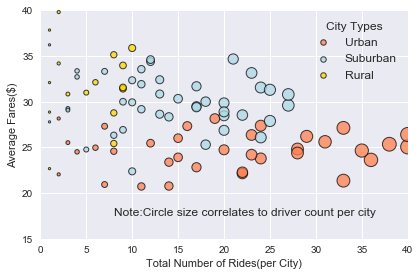

In [76]:
fig, ax = plt.subplots()
ax.scatter(urban_number_driver_count,urban_average_fare,s=urban_number_driver_count*5,
           c='coral',edgecolors='black',lw=1,alpha=0.75,marker='o',label='Urban')

ax.scatter(Suburban_number_driver_count,Suburban_average_fare,s=Suburban_number_driver_count*5,
           c='lightblue',edgecolors='black',lw=1,alpha=0.75,marker='o',label='Suburban')

ax.scatter(Rural_number_driver_count,Rural_average_fare,s=Rural_number_driver_count*5,
           c='Gold',edgecolors='black',lw=1,alpha=0.75,marker='o',label='Rural')

ax.set_xlim(0,40)
ax.set_ylim(15,40)


#titles and annotation
plt.title=('Pyber Ride Sharing Data (2016)')
plt.annotate('Note:Circle size correlates to driver count per city', 
            xy=(0.2, .1),xycoords='axes points',
            xytext=(0.2, .1), textcoords='axes fraction'
           )
ax.set_xlabel('Total Number of Rides(per City)')
ax.set_ylabel('Average Fares($)')

#legend and legend handling
lgnd=ax.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#add grids
sns.set(style="darkgrid", color_codes=True)
fig.tight_layout()
plt.show()